In [1]:
import numpy as np
from matplotlib import pyplot as plt
from SA import SA
from run_simulation import run_multiple_simulation

In [2]:
# temperature_lin = SA(dimension=51, num_i=1000000, initial_temperature=1, MC_length=1).gen_cooling_schedule_lin()
# temperature_geo = SA(dimension=51, num_i=1000000, initial_temperature=1, MC_length=1).gen_cooling_schedule_geo()
# temperature_inv = SA(dimension=51, num_i=1000000, initial_temperature=1, MC_length=1).gen_cooling_schedule_inv()

In [3]:
SA = SA(51)
Ts = SA.Ts
MC_lengths = SA.MC_lengths

print(Ts.shape)

(4, 3, 1000001)


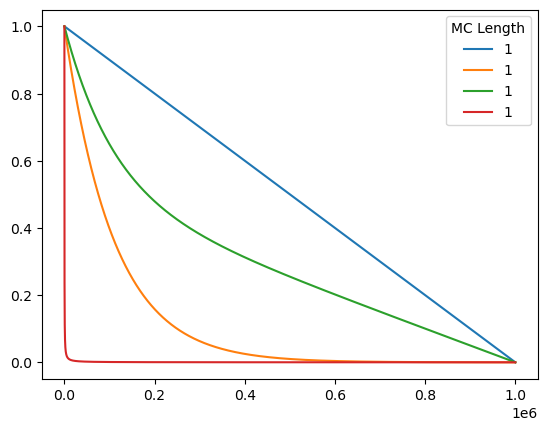

In [4]:
# for MC_length_idx, MC_length in enumerate(MC_lengths):
for i in range(SA.num_schedules):
    plt.plot(Ts[i, 0], label=1)

plt.legend(title='MC Length')

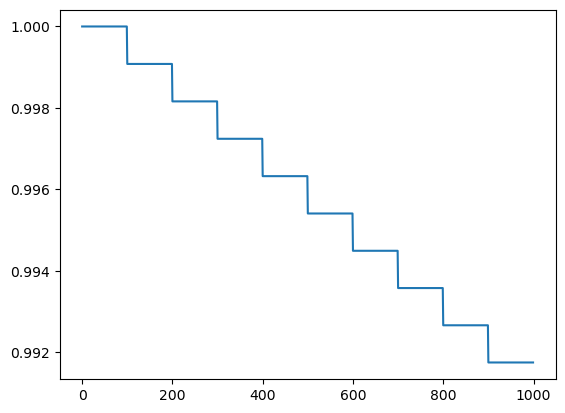

In [5]:
plt.plot(Ts[1, 2, :1000])

In [6]:
rng = np.random.default_rng(seed=42)
np.sort([rng.choice(range(10), size=2, replace=False) for _ in  range(30)])

array([[0, 7],
       [3, 4],
       [0, 6],
       [0, 5],
       [6, 7],
       [5, 7],
       [4, 7],
       [1, 3],
       [6, 7],
       [5, 7],
       [2, 4],
       [4, 8],
       [7, 8],
       [1, 5],
       [3, 6],
       [4, 8],
       [6, 7],
       [1, 3],
       [0, 4],
       [1, 7],
       [7, 8],
       [4, 8],
       [3, 8],
       [4, 7],
       [1, 4],
       [3, 4],
       [5, 6],
       [1, 3],
       [5, 7],
       [2, 7]])

In [7]:
results_sa, route = run_multiple_simulation(dimension=51, num_i=1000000, num_run=50, temperature=1, alg_type='SA', SA_type='lin', load_file=True)

TypeError: run_multiple_simulation() got an unexpected keyword argument 'temperature'

In [16]:
results_hc, route = run_multiple_simulation(dimension=51, num_i=1000000, num_run=50, alg_type='HC', load_file=True)

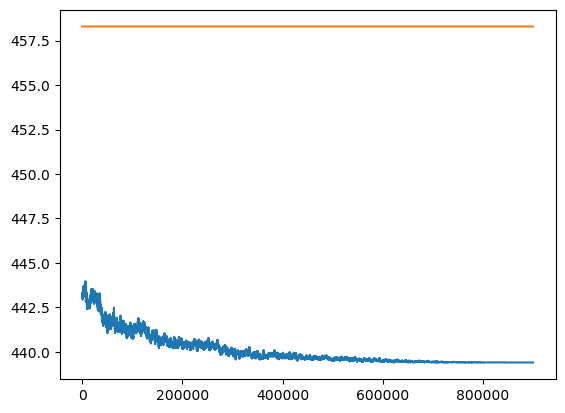

In [28]:
mean_results = np.mean(results_sa, axis=0)[100000:1000000]
mean_results_hc = np.mean(results_hc, axis=0)[100000:1000000]

plt.plot(range(len(mean_results)), mean_results)
plt.plot(range(len(mean_results_hc)), mean_results_hc)

In [ ]:
results_sa[:,-1]
results_hc[:,-1]

array([445.25845378, 433.85580409, 437.47518033, 431.42143678,
       442.66732776, 433.32281235, 435.36343814, 438.65965963,
       442.9858468 , 438.78145054, 442.94722462, 438.56779647,
       435.85755406, 441.11866583, 443.13875329, 435.4595949 ,
       431.43308213, 442.83039259, 434.19663527, 433.52193667,
       450.28446755, 449.31771339, 431.10323766, 440.47964461,
       438.38346998, 434.20330815, 447.86036947, 448.58001434,
       436.9197763 , 445.79825663, 445.22250801, 440.37732669,
       440.0495163 , 449.4484914 , 437.80273674, 434.14211925,
       440.76311642, 443.15264257, 432.37803868, 435.71772345,
       437.76705926, 442.12374399, 435.25976239, 441.29814056,
       436.37695339, 433.99943333, 439.36619615, 438.89337196,
       443.86346748, 440.52510871])

In [ ]:
def Welch_test(result_1,result_2): 
    mean_1=np.mean(result_1)
    mean_2=np.mean(result_2)
    var_1 = np.var(result_1, ddof=1) 
    var_2 = np.var(result_2, ddof=1)
    



In [8]:
def line_plot(results): 
    mean = np.mean(results_sa[0,0,0,:])
    plt.plot(mean)